<a href="https://colab.research.google.com/github/carlibeisel/DCEW_waterquality/blob/main/02_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Carli Beisel

Creation Date: November 1, 2024

Purpose: This script creates two sets of figures:

1. A plot of all known water quality data through time (from 2021 to 2024).

2. A linear regression comparing DCEW water quality to sampling distance from outlet.

## 1. A plot of all known water quality data through time (from 2021 to 2024).

In [1]:
# --------------------------- #
# Import Packages & Libraries
# --------------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import MaxNLocator

#Connect to Google Drive if you want to export images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classes/Field Hydrology/Hydro Field Course Working Files/Assignments/7. Data Analysis/Water Quality/Data/DCEW_combined_data.csv')

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

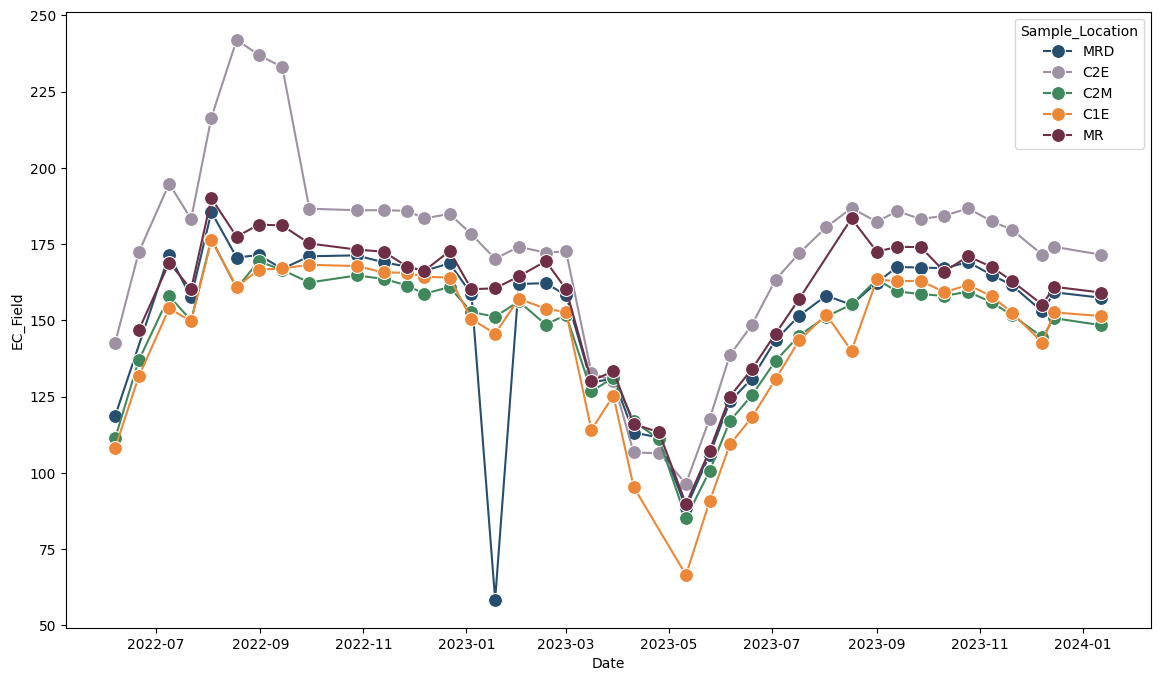

In [ ]:
# ------- #
# EC Plot
# ------- #


# Convert the Date column to date-only format and filter out extreme values
data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date
data = data[data['EC_Field'] < 1000]

# Define the date range for October 2024
oct_start = pd.to_datetime("2024-10-01").date()
oct_end = pd.to_datetime("2024-11-01").date()

# Separate October 2024 data
october_2024_data = data[(data['Date'] >= oct_start) & (data['Date'] < oct_end)]
main_data = data[~data['Date'].isin(october_2024_data['Date'])]

# Define the custom color palette
custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Plot main continuous line for all dates except October 2024
plt.figure(figsize=(14, 8))
sns.lineplot(data=main_data, x='Date', y='EC_Field', hue='Sample_Location', palette=custom_palette, marker='o', markersize=10)

# Plot October 2024 data separately as unconnected scatter points
for loc in october_2024_data['Sample_Location'].unique():
    subset = october_2024_data[october_2024_data['Sample_Location'] == loc]
    plt.scatter(subset['Date'], subset['EC_Field'], label=f'{loc} (Oct 2024)', color=custom_palette[loc], edgecolor='black', marker='D')

# Customize plot appearance
plt.title('DCEW Electrical Conductivity', fontsize=24)
plt.xlabel('')
plt.xticks(fontsize=18, rotation=45)
plt.ylabel('EC (uS/m)', fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Sample Location', fontsize=14, title_fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

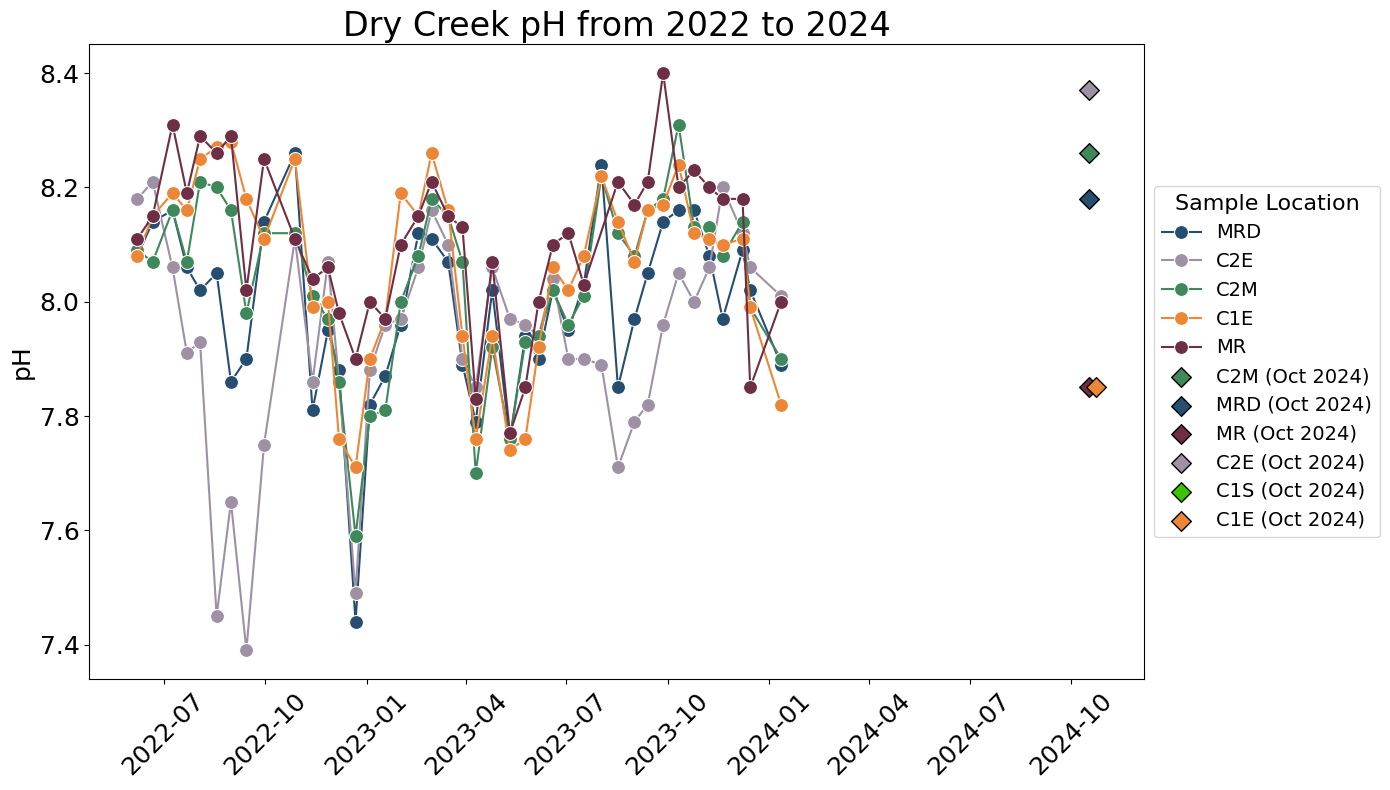

In [ ]:
# ------- #
# pH Plot
# ------- #
# Convert the Date column to date-only format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date

# Define the custom color palette
custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Define the date range for October 2024
oct_start = pd.to_datetime("2024-10-01").date()
oct_end = pd.to_datetime("2024-11-01").date()

# Separate October 2024 data
october_2024_data = data[(data['Date'] >= oct_start) & (data['Date'] < oct_end)]
main_data = data[~data['Date'].isin(october_2024_data['Date'])]

# Plot main continuous line for all dates except October 2024
plt.figure(figsize=(14, 8))
sns.lineplot(data=main_data, x='Date', y='pH', hue='Sample_Location', palette=custom_palette, marker='o', markersize=10)

# Plot October 2024 data separately as unconnected scatter points with increased size
for loc in october_2024_data['Sample_Location'].unique():
    subset = october_2024_data[october_2024_data['Sample_Location'] == loc]
    plt.scatter(subset['Date'], subset['pH'], label=f'{loc} (Oct 2024)', color=custom_palette[loc], edgecolor='black', marker='D', s=100)

# Customize plot appearance
plt.title('Dry Creek pH from 2022 to 2024', fontsize=24)
plt.xlabel('')
plt.xticks(fontsize=18, rotation=45)
plt.ylabel('pH', fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Sample Location', fontsize=14, title_fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

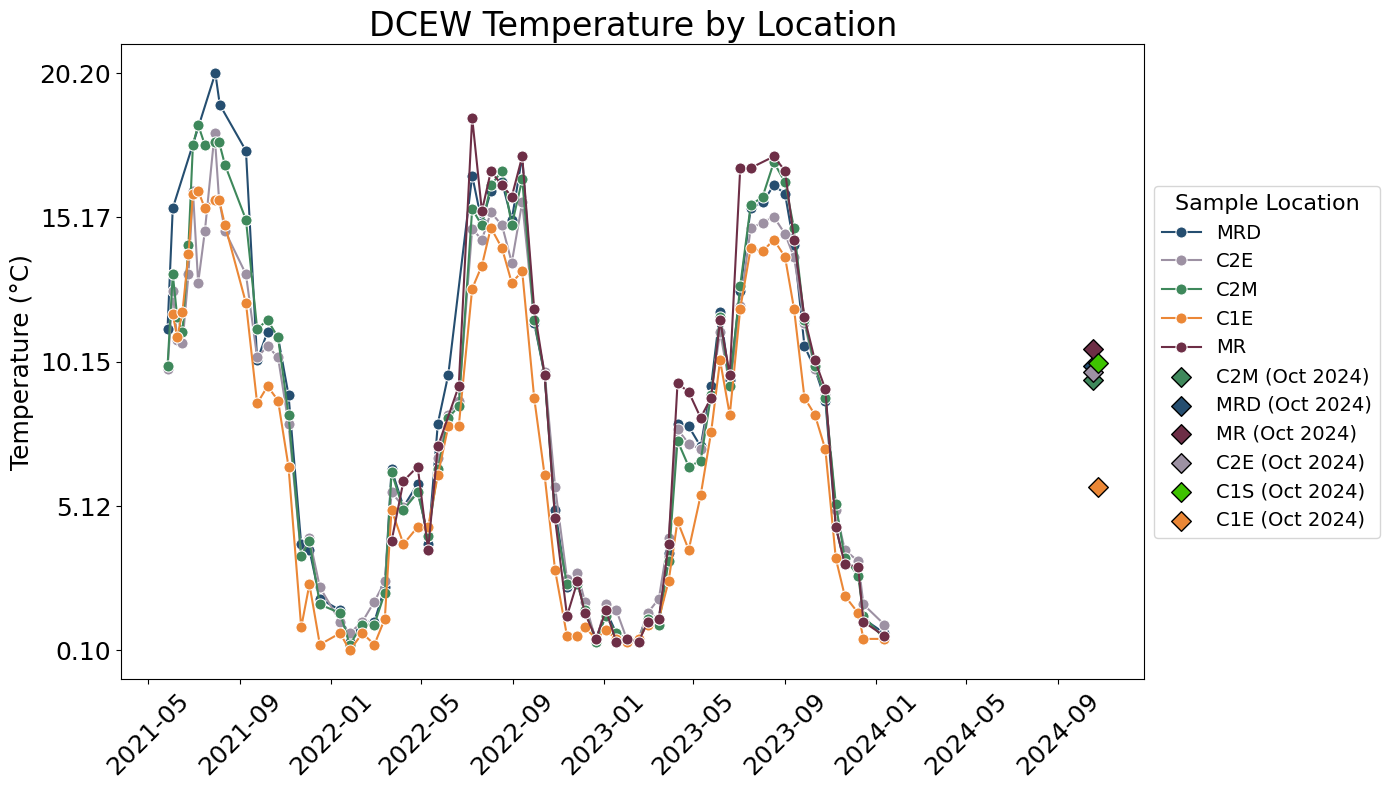

In [ ]:
# ------- #
# Temp Plot
# ------- #

# Convert the Date column to date-only format and ensure Temperature_Field is numeric
data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date
data['Temperature_Field'] = pd.to_numeric(data['Temperature_Field'], errors='coerce')

# Define the custom color palette
custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Define the date range for October 2024
oct_start = pd.to_datetime("2024-10-01").date()
oct_end = pd.to_datetime("2024-11-01").date()

# Separate October 2024 data
october_2024_data = data[(data['Date'] >= oct_start) & (data['Date'] < oct_end)]
main_data = data[~data['Date'].isin(october_2024_data['Date'])]

# Plot main continuous line for all dates except October 2024
plt.figure(figsize=(14, 8))
sns.lineplot(data=main_data, x='Date', y='Temperature_Field', hue='Sample_Location', palette=custom_palette, marker='o', markersize=8)

# Plot October 2024 data separately as unconnected scatter points with increased size
for loc in october_2024_data['Sample_Location'].unique():
    subset = october_2024_data[october_2024_data['Sample_Location'] == loc]
    plt.scatter(subset['Date'], subset['Temperature_Field'], label=f'{loc} (Oct 2024)', color=custom_palette[loc], edgecolor='black', marker='D', s=100)

# Customize plot appearance
plt.title('DCEW Temperature by Location', fontsize=24)
plt.xlabel('')
plt.xticks(fontsize=18, rotation=45)
plt.ylabel('Temperature ('"\u00B0"'C)', fontsize=18)
plt.yticks (fontsize=18)

# Reduce the number of y-axis ticks
plt.yticks(np.linspace(data['Temperature_Field'].min(), data['Temperature_Field'].max(), 5))  # Adjust number of ticks as needed

plt.legend(title='Sample Location', fontsize=14, title_fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

<ipython-input-75-5badb23dea20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date
<ipython-input-75-5badb23dea20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temperature_Field'] = pd.to_numeric(data['Temperature_Field'], errors='coerce')
<ipython-input-75-5badb23dea20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

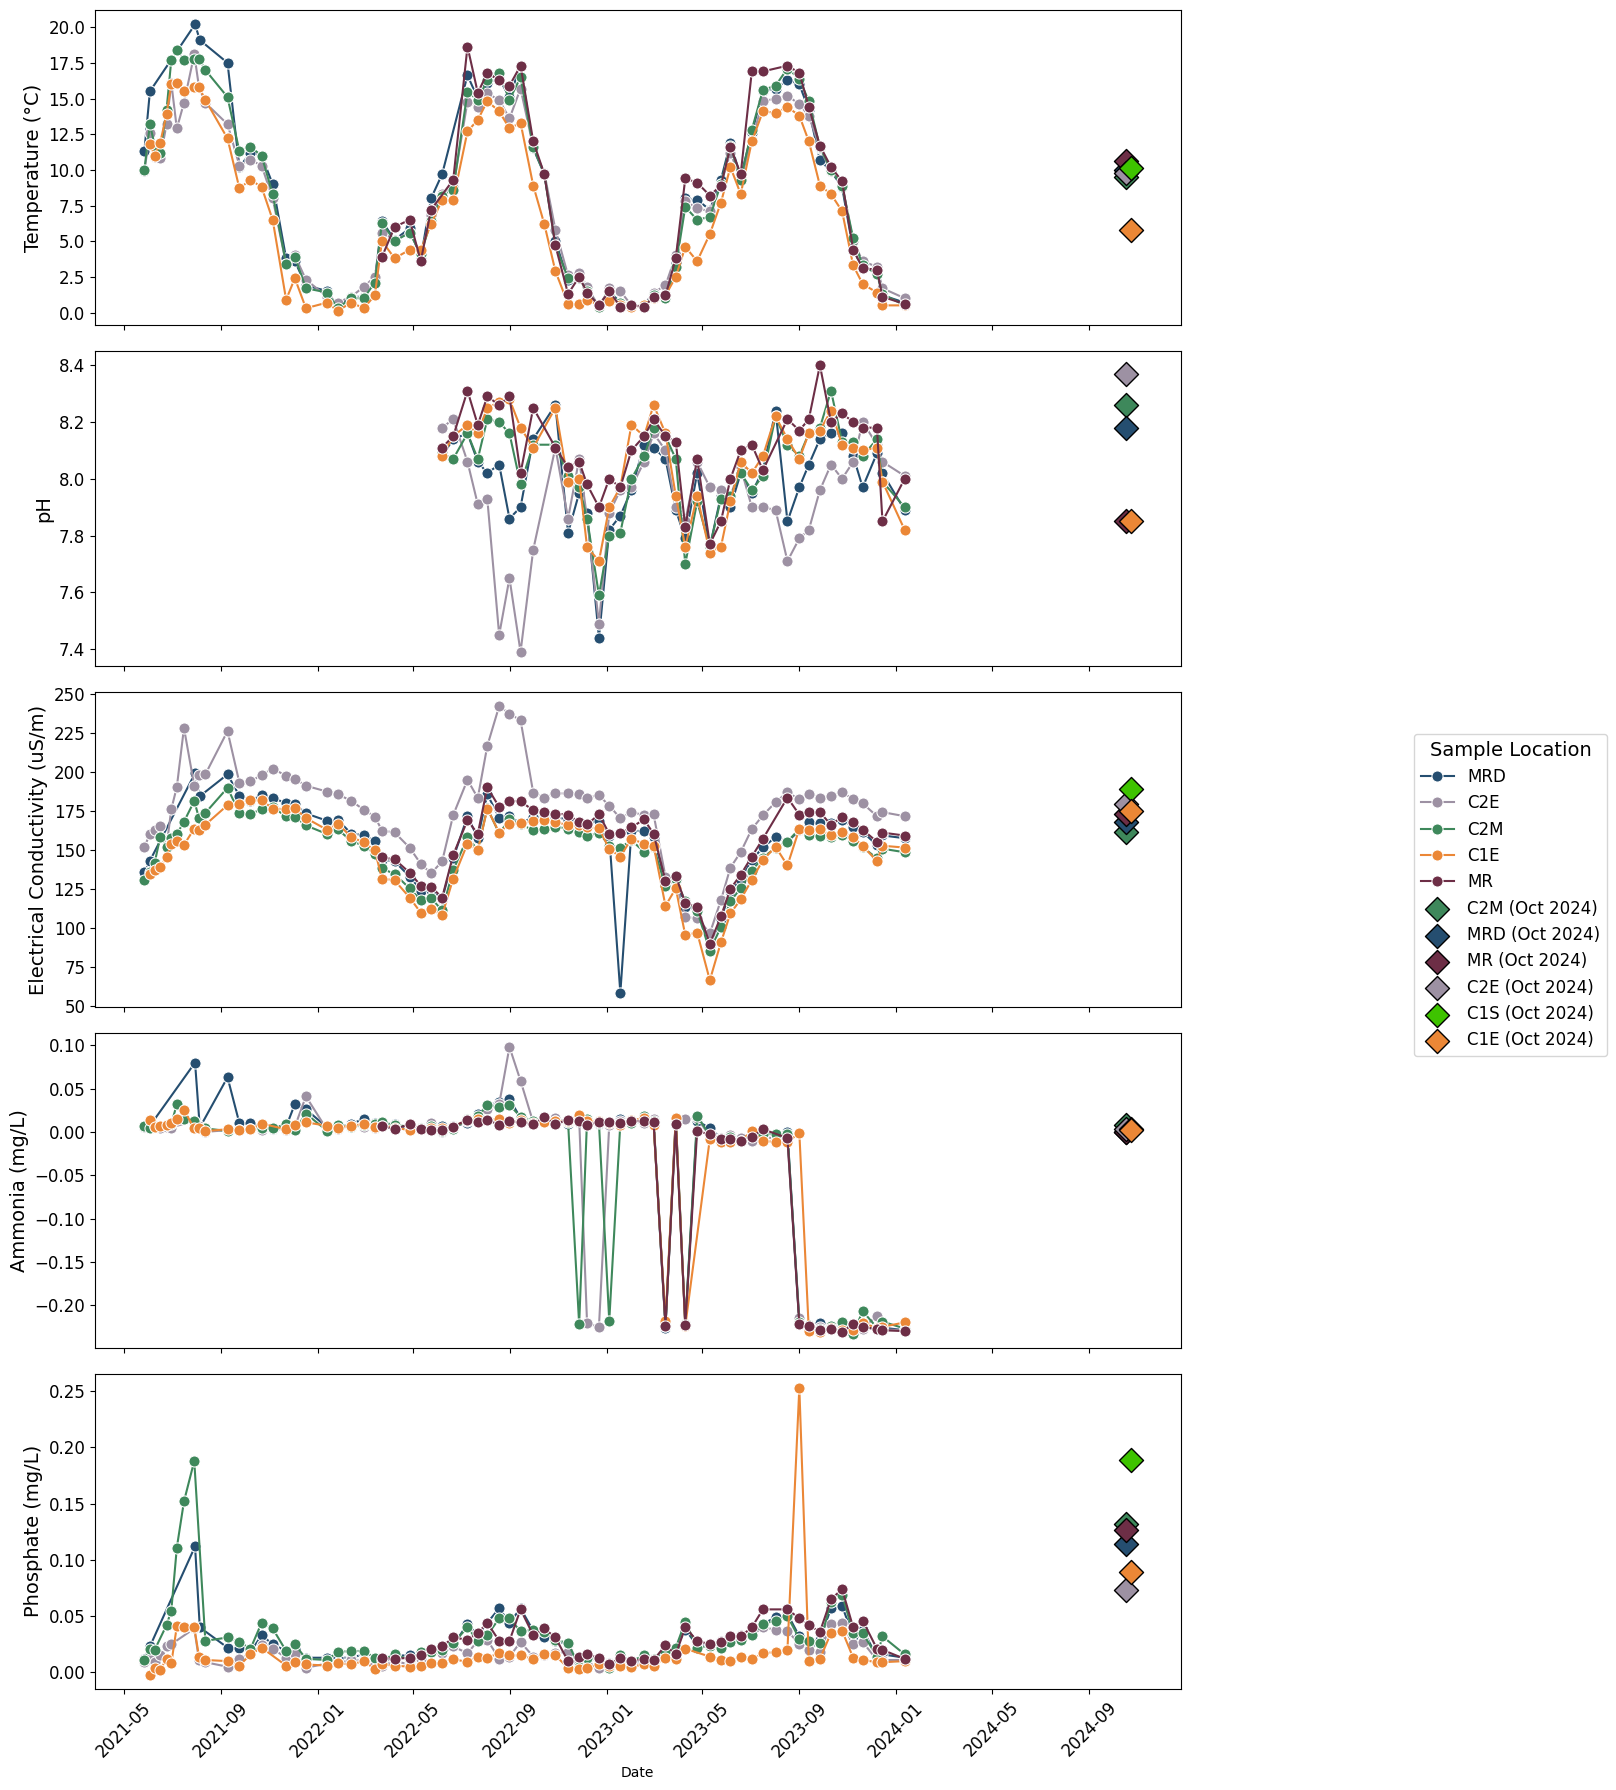

In [ ]:
data = data[data['EC_Field'] <= 1000]

# Convert the Date column to date-only format and ensure numeric conversion for the variables
data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date
data['Temperature_Field'] = pd.to_numeric(data['Temperature_Field'], errors='coerce')
data['EC_Field'] = pd.to_numeric(data['EC_Field'], errors='coerce')
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')
data['Nutrients_PO4.Conc.'] = pd.to_numeric(data['Nutrients_PO4.Conc.'], errors='coerce')
data['Nutrients_NH3.Conc.'] = pd.to_numeric(data['Nutrients_NH3.Conc.'], errors='coerce')

# Define the custom color palette
custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Define the date range for October 2024
oct_start = pd.to_datetime("2024-10-01").date()
oct_end = pd.to_datetime("2024-11-01").date()

# Separate October 2024 data
october_2024_data = data[(data['Date'] >= oct_start) & (data['Date'] < oct_end)]
main_data = data[~data['Date'].isin(october_2024_data['Date'])]

# Define the variables and labels for each plot
variables = {
    "Temperature_Field": "Temperature (°C)",
    "pH": "pH",
    "EC_Field": "Electrical Conductivity (uS/m)",
    "Nutrients_NH3.Conc.": "Ammonia (mg/L)",
    "Nutrients_PO4.Conc.": "Phosphate (mg/L)"
}

# Create a figure with five subplots
fig, axes = plt.subplots(5, 1, figsize=(14, 18), sharex=True)

# Loop through each variable and plot
for ax, (variable, ylabel) in zip(axes, variables.items()):
    # Plot main data as a continuous line
    sns.lineplot(data=main_data, x='Date', y=variable, hue='Sample_Location',
                 palette=custom_palette, marker='o', markersize=8, ax=ax)

    # Plot October 2024 data as separate scatter points
    for loc in october_2024_data['Sample_Location'].unique():
        subset = october_2024_data[october_2024_data['Sample_Location'] == loc]
        ax.scatter(subset['Date'], subset[variable], label=f'{loc} (Oct 2024)',
                   color=custom_palette.get(loc, '#CCCCCC'), edgecolor='black',
                   marker='D', s=150)

    # Customize appearance
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend().remove()  # Remove individual legends to keep one global legend

# Add a single shared x-axis label
fig.text(0.5, 0.04, '', ha='center', fontsize=16)

# Rotate x-axis labels and customize
plt.setp(axes[-1].xaxis.get_majorticklabels(), rotation=45, fontsize=12)

# Add a single legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Sample Location', fontsize=12, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for the legend on the right
plt.show()

## 2. A linear regression comparing DCEW water quality to sampling distance from outlet for only samples collected in November 2024.

In [ ]:
# --------------------------- #
# Import Packages & Libraries
# --------------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Connect to Google Drive if you want to export images
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classes/Field Hydrology/Hydro Field Course Working Files/Assignments/7. Data Analysis/Water Quality/Data/WQ Metadata - DCEW - Master Sheet.csv')

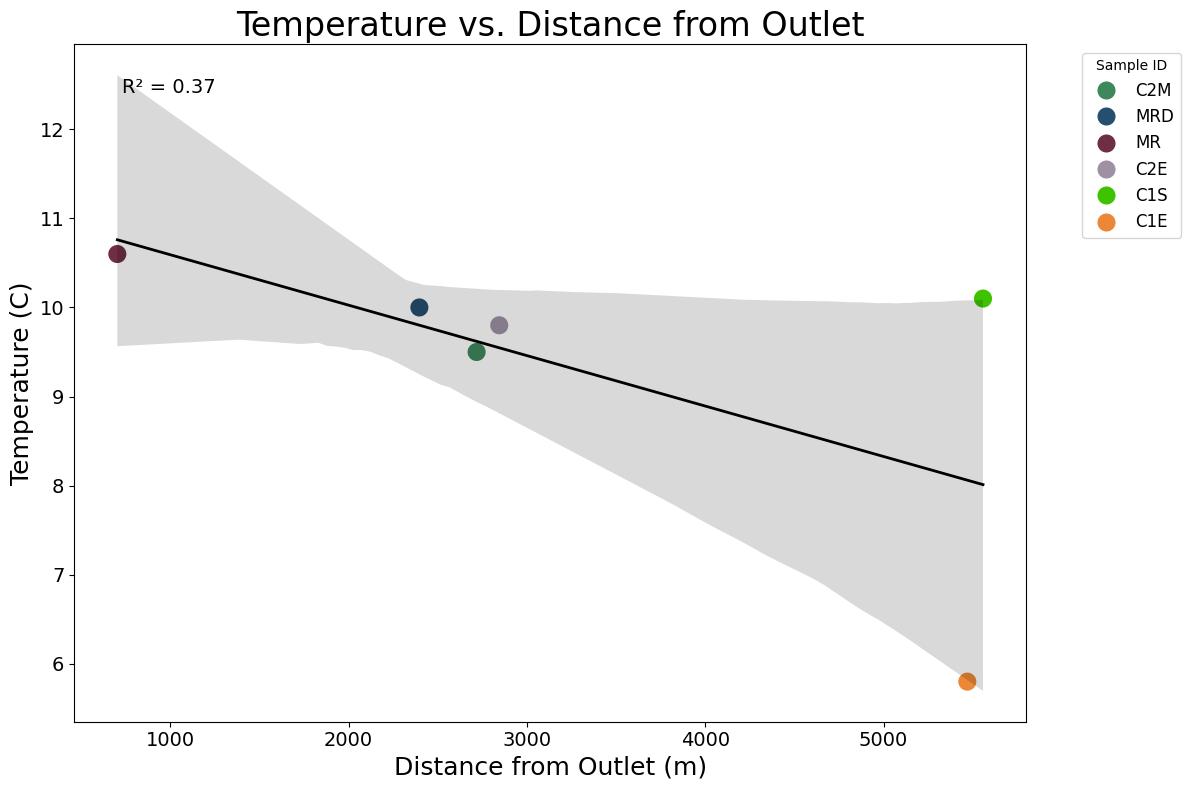

In [ ]:
# Define custom colors for each Sample ID
custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Calculate the regression line and R² value
slope, intercept, r_value, p_value, std_err = linregress(data['Distance from Outlet'], data['Temp (C)'])
r_squared = r_value**2

# Plot scatter with custom colors for each Sample ID
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Distance from Outlet', y='Temp (C)', hue='Sample ID', palette=custom_palette, s=200)

# Add a single regression line for the entire dataset
sns.regplot(data=data, x='Distance from Outlet', y='Temp (C)', scatter=False, color='black', line_kws={'linewidth': 2})

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

# Add plot labels and title
plt.title('Temperature vs. Distance from Outlet', fontsize=24)
plt.xlabel('Distance from Outlet (m)', fontsize=18)
plt.ylabel('Temperature (C)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Move the legend outside the plot
plt.legend(title='Sample ID', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
temp = plt

In [ ]:
data

,Sample Date,Site Name,GPS Coordinates (MT),Distance from Outlet (m),EC (uS/m),Temp (C),pH,SSL (mg/L),NH3 (mg/L),PO4 (mg/L),Sampling Notes,Analysis Notes,Distance from
0,10/17,Con2Main,"43.7022778, -116.154095",2718,161.4,9.5,8.26,1.866,0.0085,0.1315,NaN,NaN,NaN
1,10/17,Meadown Reach Down,"43.7002778, -116.156944",2397,167.6,10.0,8.18,2.809,0.0000,0.1140,NaN,NaN,NaN
2,10/17,Middle Rose,"43.6897222, -116.1705555",703,173.2,10.6,7.85,2.872,0.0000,0.1270,NaN,NaN,NaN
3,10/17,Con2East,"43.7027903, -116.1527722",2845,179.5,9.8,8.37,0.930,0.0030,0.0735,NaN,NaN,NaN
4,10/24,Con1Spring,"43.71883, -116.13778",5558,188.8,10.1,NaN,NaN,0.0030,0.1890,Not enough water to get a 1L sample for TSS,NaN,NaN
5,10/24,Con1East,"43.71804, -116.13737",5470,174.7,5.8,7.85,0.473,0.0020,0.0890,NaN,NaN,NaN


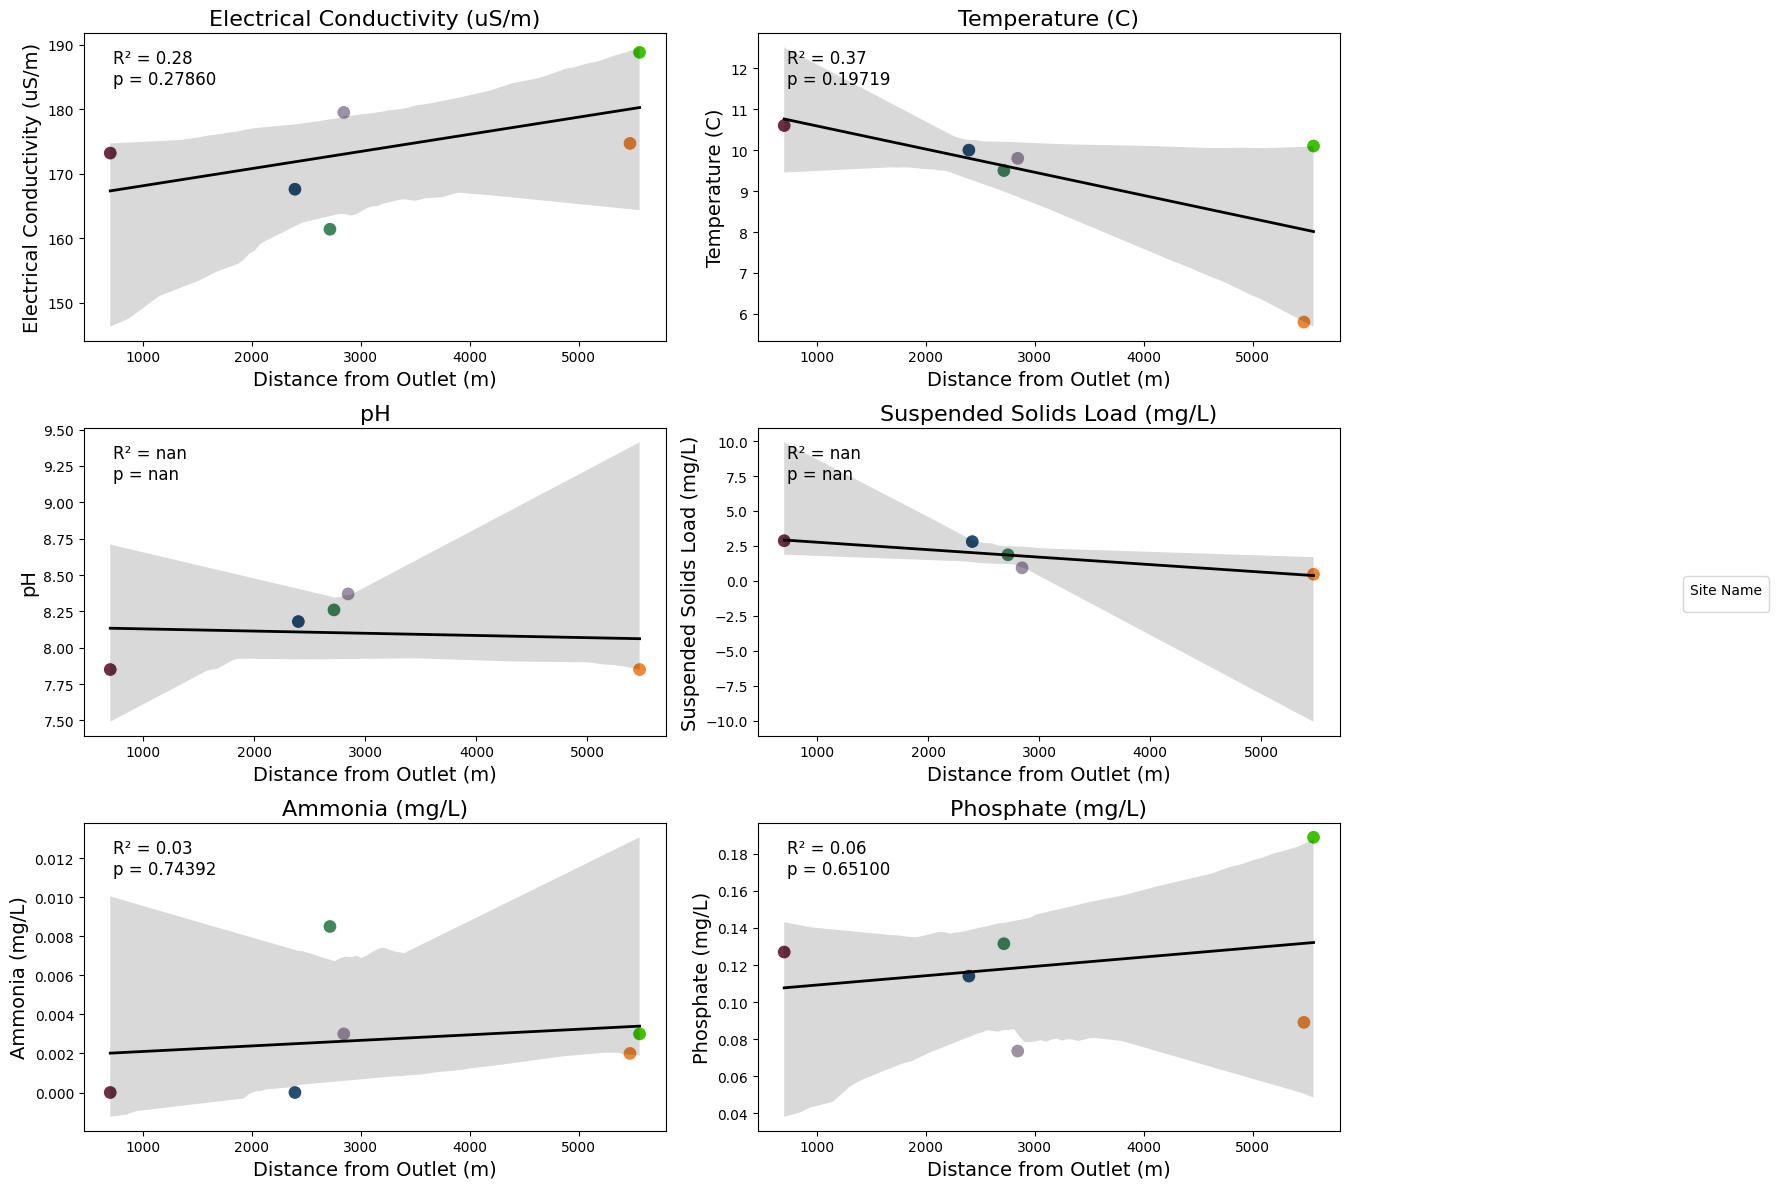

P-values for each regression:
EC (uS/m): p-value = 0.27860
Temp (C): p-value = 0.19719
pH: p-value = nan
SSL (mg/L): p-value = nan
NH3 (mg/L): p-value = 0.74392
PO4 (mg/L): p-value = 0.65100


In [ ]:
# Define custom colors for each Sample ID
custom_palette = {
    'Con2Main': '#3E885B',
    'Meadown Reach Down': '#254E70',
    'Middle Rose': '#6D2E46',
    'Con2East': '#9D91A3',
    'Con1Spring': '#3EC300',
    'Con1East': '#EB8736'
}

# Define the variables to plot
variables = {
    "EC (uS/m)": "Electrical Conductivity (uS/m)",
    "Temp (C)": "Temperature (C)",
    "pH": "pH",
    "SSL (mg/L)": "Suspended Solids Load (mg/L)",
    "NH3 (mg/L)": "Ammonia (mg/L)",
    "PO4 (mg/L)": "Phosphate (mg/L)"
}

# Initialize a dictionary to store p-values for each variable
p_values = {}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot each variable against Distance from Outlet
for i, (variable, ylabel) in enumerate(variables.items()):
    # Calculate the regression line and R² value
    slope, intercept, r_value, p_value, std_err = linregress(data['Distance from Outlet (m)'], data[variable])
    r_squared = r_value**2

    # Store the p-value in the dictionary
    p_values[variable] = p_value

    # Scatter plot with custom colors (suppress legend in each individual plot)
    scatter = sns.scatterplot(data=data, x='Distance from Outlet (m)', y=variable, hue='Site Name', palette=custom_palette, s=100, ax=axes[i], legend=False)

    # Add a single regression line for the entire dataset with 95% confidence interval
    sns.regplot(data=data, x='Distance from Outlet (m)', y=variable, scatter=False, color='black', line_kws={'linewidth': 2}, ci=95, ax=axes[i])

    # Add R² and p-value to the plot
    axes[i].text(0.05, 0.95, f'R² = {r_squared:.2f}\np = {p_value:.5f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

    # Add labels and title
    axes[i].set_title(f'{ylabel}', fontsize=16)
    axes[i].set_xlabel('Distance from Outlet (m)', fontsize=14)
    axes[i].set_ylabel(ylabel, fontsize=14)

# Add a single legend with the colors for Sample ID to the right of the figure
handles, labels = scatter.get_legend_handles_labels()
fig.legend(handles, labels, title='Site Name', loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
plt.show()

# Print p-values for each variable
print("P-values for each regression:")
for variable, p_val in p_values.items():
    print(f"{variable}: p-value = {p_val:.5f}")

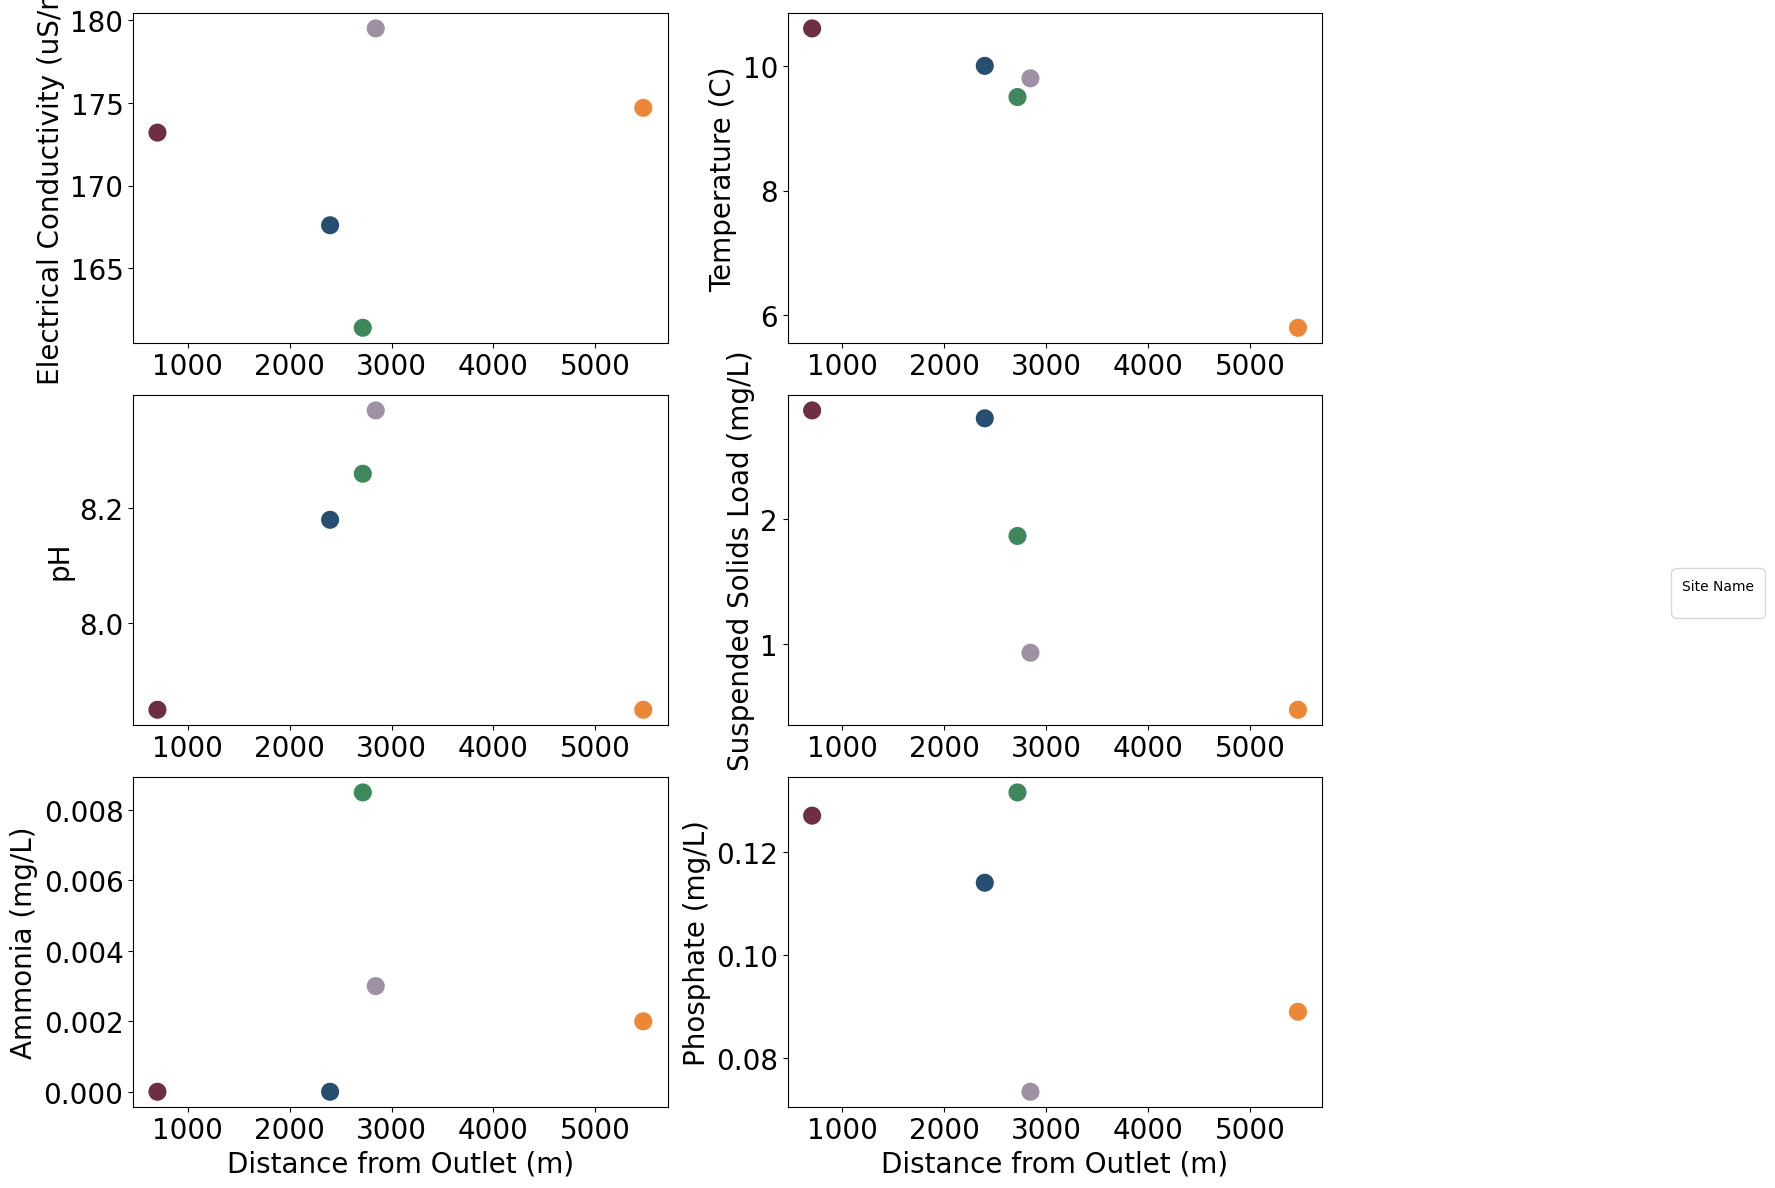

In [ ]:
# Define custom colors for each Sample ID
custom_palette = {
    'Con2Main': '#3E885B',
    'Meadown Reach Down': '#254E70',
    'Middle Rose': '#6D2E46',
    'Con2East': '#9D91A3',
    'Con1Spring': '#3EC300',
    'Con1East': '#EB8736'
}

# Define the variables to plot
variables = {
    "EC (uS/m)": "Electrical Conductivity (uS/m)",
    "Temp (C)": "Temperature (C)",
    "pH": "pH",
    "SSL (mg/L)": "Suspended Solids Load (mg/L)",
    "NH3 (mg/L)": "Ammonia (mg/L)",
    "PO4 (mg/L)": "Phosphate (mg/L)"
}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot each variable against Distance from Outlet
for i, (variable, ylabel) in enumerate(variables.items()):
    # Scatter plot with custom colors (suppress legend in each individual plot)
    sns.scatterplot(
        data=data,
        x='Distance from Outlet (m)',
        y=variable,
        hue='Site Name',
        palette=custom_palette,
        s=200,
        ax=axes[i],
        legend=False
    )

    # Add labels
    axes[i].set_ylabel(ylabel, fontsize=20)

    # Only add x-axis labels to the bottom two panels
    if i >= len(variables) - 2:  # Bottom two panels
        axes[i].set_xlabel('Distance from Outlet (m)', fontsize=20)
    else:
        axes[i].set_xlabel('')  # Remove x-axis labels for top panels

# Make x and y ticks larger
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
# Adjust for empty axes if variables < subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend with the colors for Sample ID to the right of the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Site Name', loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=20)

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
plt.show()


## 3. Box plot of averages

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Classes/Field Hydrology/Hydro Field Course Working Files/Assignments/7. Data Analysis/Water Quality/Data/DCEW_combined_data.csv')

October 2024 Data:
     Unnamed: 0 Sample_Location Date_Time  AA500_Bottle  IC_Bottle  \
336         336             C2M  10/17/24           NaN        NaN   
339         339             C2E  10/17/24           NaN        NaN   
341         341             C1E  10/24/24           NaN        NaN   

     Isotope_Bottle  Temperature_Field  EC_Field    pH  Nutrients_NOx.Conc.  \
336             NaN                9.5     161.4  8.26                  NaN   
339             NaN                9.8     179.5  8.37                  NaN   
341             NaN                5.8     174.7  7.85                  NaN   

     ...  Processed.Delta.18O.StDev        Date  Sample Date  Site Name  \
336  ...                        NaN  2024-10-17        10/17   Con2Main   
339  ...                        NaN  2024-10-17        10/17   Con2East   
341  ...                        NaN  2024-10-24        10/24   Con1East   

         GPS Coordinates (MT)  Distance from Outlet (m)  SSL (mg/L)  \
336   43.70

<ipython-input-11-fbc244437663>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-11-fbc244437663>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Plotting pH data:
    Sample_Location    pH
127             MRD  8.08
129             C2M  8.09
130             C1E  8.08
133             C2E  8.21
134             C2M  8.07
..              ...   ...
270             C1E  8.02
276              MR  8.03
336             C2M  8.26
339             C2E  8.37
341             C1E  7.85

[104 rows x 2 columns]
Plotting Temperature_Field data:
    Sample_Location  Temperature_Field
127             MRD                9.7
129             C2M                8.2
130             C1E                7.9
133             C2E                8.8
134             C2M                8.6
..              ...                ...
270             C1E               12.0
276              MR               16.9
336             C2M                9.5
339             C2E                9.8
341             C1E                5.8

[104 rows x 2 columns]


<ipython-input-11-fbc244437663>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-11-fbc244437663>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Plotting Nutrients_PO4.Conc. data:
    Sample_Location  Nutrients_PO4.Conc.
127             MRD               0.0210
129             C2M               0.0200
130             C1E               0.0080
133             C2E               0.0230
134             C2M               0.0260
..              ...                  ...
270             C1E               0.0115
276              MR               0.0560
336             C2M               0.1315
339             C2E               0.0735
341             C1E               0.0890

[104 rows x 2 columns]
Plotting Nutrients_NH3.Conc. data:
    Sample_Location  Nutrients_NH3.Conc.
127             MRD               0.0070
129             C2M               0.0010
130             C1E               0.0050
133             C2E               0.0050
134             C2M               0.0030
..              ...                  ...
270             C1E               0.0005
276              MR               0.0030
336             C2M               0.0085
339 

<ipython-input-11-fbc244437663>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


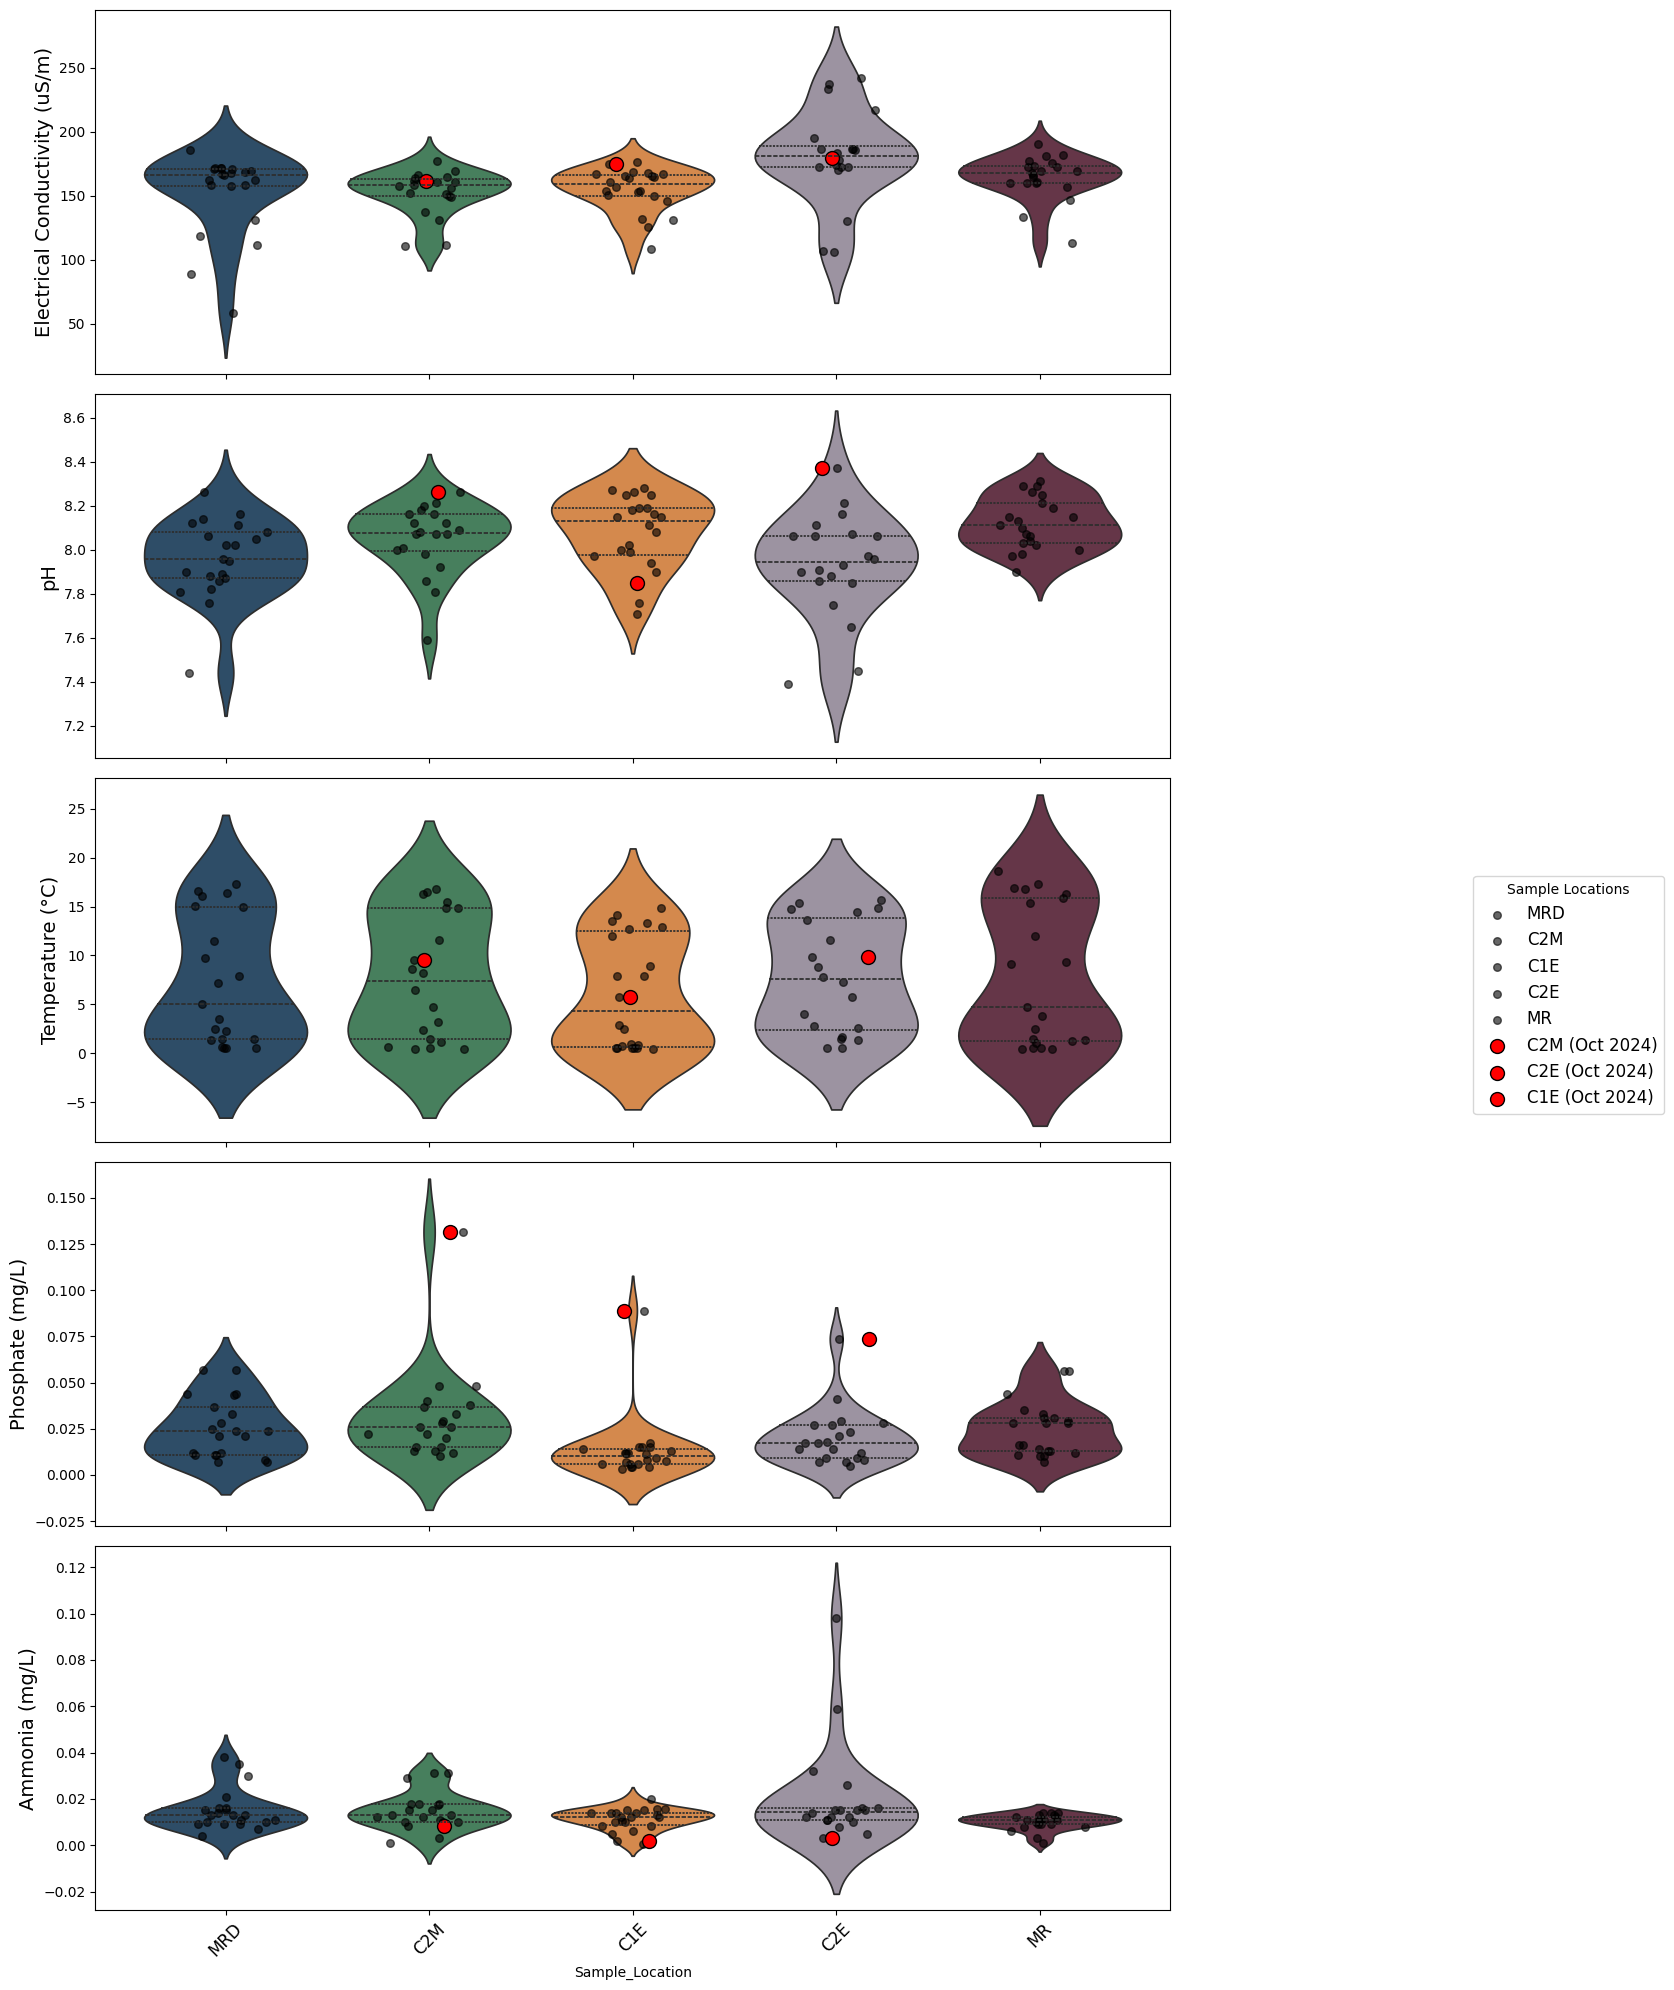

In [11]:
# Define custom color palette
custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Ensure the data columns are numeric
data['EC_Field'] = pd.to_numeric(data['EC_Field'], errors='coerce')
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')
data['Temperature_Field'] = pd.to_numeric(data['Temperature_Field'], errors='coerce')
data['Nutrients_PO4.Conc.'] = pd.to_numeric(data['Nutrients_PO4.Conc.'], errors='coerce')
data['Nutrients_NH3.Conc.'] = pd.to_numeric(data['Nutrients_NH3.Conc.'], errors='coerce')

# Drop rows with NaN values in the relevant columns
data = data.dropna(subset=['EC_Field', 'pH', 'Temperature_Field', 'Nutrients_NH3.Conc.', 'Nutrients_PO4.Conc.'])

# Filter out extreme EC_Field values
data = data[data['EC_Field'] < 1000]
data = data[data['Nutrients_PO4.Conc.'] > 0]
data = data[data['Nutrients_NH3.Conc.'] > 0]

# Convert Date to datetime and filter October 2024 data
data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date
oct_start = pd.to_datetime("2024-10-01").date()
oct_end = pd.to_datetime("2024-11-01").date()
october_2024_data = data[(data['Date'] >= oct_start) & (data['Date'] < oct_end)]

# Debugging October 2024 data
print("October 2024 Data:")
print(october_2024_data)

# Define variables and labels
variables = {
    "EC_Field": "Electrical Conductivity (uS/m)",
    "pH": "pH",
    "Temperature_Field": "Temperature (°C)",
    "Nutrients_PO4.Conc.": "Phosphate (mg/L)",
    "Nutrients_NH3.Conc.": "Ammonia (mg/L)"
}

# Create a mapping for Sample_Location
locations = data['Sample_Location'].unique()
loc_map = {loc: idx for idx, loc in enumerate(locations)}

# Create subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(14, 20), sharex=True)

for ax, (variable, ylabel) in zip(axes, variables.items()):
    print(f"Plotting {variable} data:")
    print(data[['Sample_Location', variable]].dropna())

    # Plot violin plot using custom palette
    sns.violinplot(
        data=data, x='Sample_Location', y=variable,
        palette=custom_palette, inner='quartile', ax=ax
    )

    # Overlay general data points in black
    for loc in locations:
        subset = data[data['Sample_Location'] == loc]
        jitter = np.random.normal(0, 0.1, size=len(subset))
        ax.scatter(
            [loc_map[loc] + j for j in jitter], subset[variable],
            label=f'{loc}', color='black', alpha=0.6, s=30
        )

    # Overlay October 2024 data
    for loc in october_2024_data['Sample_Location'].unique():
        subset = october_2024_data[october_2024_data['Sample_Location'] == loc]
        jitter = np.random.normal(0, 0.1, size=len(subset))
        ax.scatter(
            [loc_map.get(loc, -1) + j for j in jitter], subset[variable],
            label=f'{loc} (Oct 2024)', color='red', edgecolor='black', s=100, marker='o'
        )

    # Customize subplot
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xticks(range(len(locations)))
    ax.set_xticklabels(locations, fontsize=12, rotation=45)

# Add a single legend outside the figure
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(
    handles, labels, title='Sample Locations', fontsize=12, loc='center left',
    bbox_to_anchor=(1.05, 0.5)  # Moves legend outside the figure
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust space for the legend
plt.show()

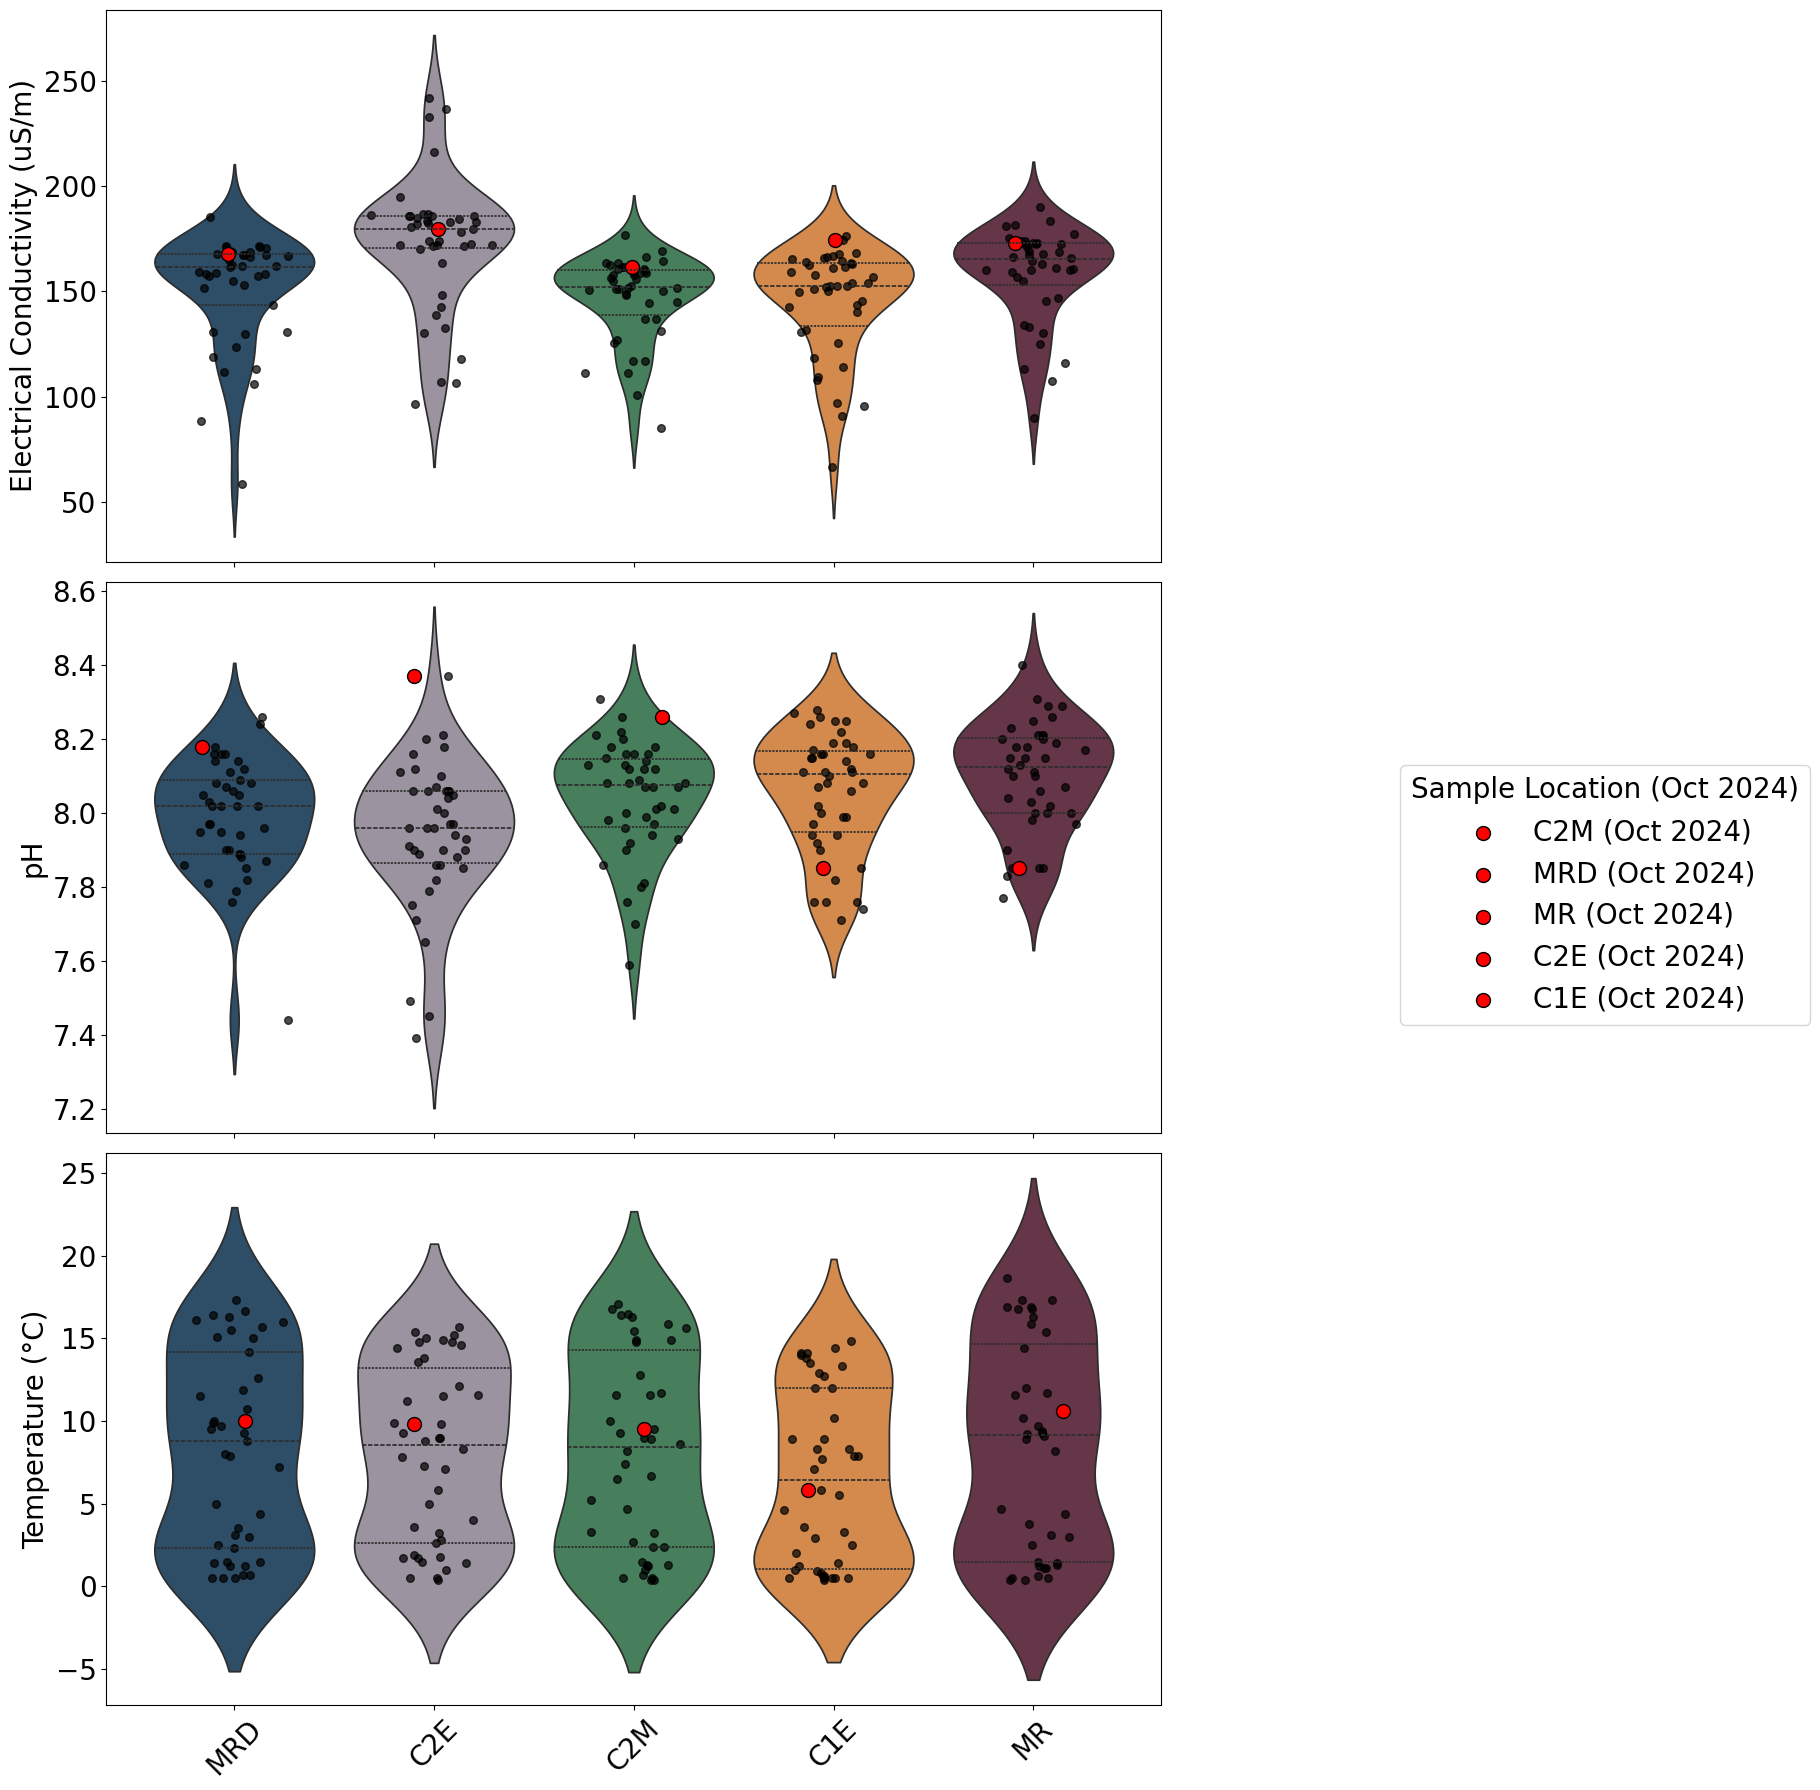

In [ ]:
# Ensure the data columns are numeric
data['EC_Field'] = pd.to_numeric(data['EC_Field'], errors='coerce')
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')
data['Temperature_Field'] = pd.to_numeric(data['Temperature_Field'], errors='coerce')

# Drop rows with NaN values in the relevant columns
data = data.dropna(subset=['EC_Field', 'pH', 'Temperature_Field'])

# Filter out extreme EC_Field values
data = data[data['EC_Field'] < 1000]

# Convert Date to datetime and filter October 2024 data
data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date
oct_start = pd.to_datetime("2024-10-01").date()
oct_end = pd.to_datetime("2024-11-01").date()
october_2024_data = data[(data['Date'] >= oct_start) & (data['Date'] < oct_end)]

# Define custom color palette
custom_palette = {
    'C2M': '#3E885B',
    'MRD': '#254E70',
    'MR': '#6D2E46',
    'C2E': '#9D91A3',
    'C1S': '#3EC300',
    'C1E': '#EB8736'
}

# Assign numeric positions for each Sample_Location
locations = data['Sample_Location'].unique()
loc_map = {loc: idx for idx, loc in enumerate(locations)}

# Define variables and labels
variables = {
    "EC_Field": "Electrical Conductivity (uS/m)",
    "pH": "pH",
    "Temperature_Field": "Temperature (°C)"
}

# Create subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(14, 18), sharex=True)

for ax, (variable, ylabel) in zip(axes, variables.items()):
    # Plot violin plot with mean and quartile lines
    sns.violinplot(
        data=data, x='Sample_Location', y=variable, hue='Sample_Location',
        palette=custom_palette, inner='quartile', dodge=False, legend=False, ax=ax
    )

    # Overlay all data points as small black dots (jittered for spread)
    for loc in data['Sample_Location'].unique():
        subset = data[data['Sample_Location'] == loc]
        jitter = np.random.normal(0, 0.1, size=len(subset))  # Add jitter to spread points
        ax.scatter(
            loc_map[loc] + jitter, subset[variable], color='black', alpha=0.7, s=30
        )

    # Overlay October 2024 data as larger red dots (jittered for spread)
    for loc in october_2024_data['Sample_Location'].unique():
        subset = october_2024_data[october_2024_data['Sample_Location'] == loc]
        jitter = np.random.normal(0, 0.1, size=len(subset))  # Add jitter to spread points
        ax.scatter(
            loc_map[loc] + jitter, subset[variable], label=f'{loc} (Oct 2024)',
            color='red', edgecolor='black', marker='o', s=100
        )

    # Customize subplot appearance
    ax.set_title("", fontsize=22)
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xticks(range(len(locations)))
    ax.set_xticklabels(locations, fontsize=20, rotation=45)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend().remove()

# Add a single legend for the figure
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Sample Location (Oct 2024)', fontsize=20, title_fontsize=20, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for the legend
plt.show()

## 4. A linear regression comparing DCEW water quality to discharge for only samples collected in November 2024.

In [2]:
# --------------------------- #
# Import Packages & Libraries
# --------------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Connect to Google Drive if you want to export images
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Classes/Field Hydrology/Hydro Field Course Working Files/Assignments/7. Data Analysis/Water Quality/Data/WQ Metadata - DCEW - Master Sheet.csv')

In [5]:
data

,Sample Date,Site Name,GPS Coordinates (MT),Streamflow (L/s),Distance from Outlet (m),EC (uS/m),Temp (C),pH,SSL (mg/L),NH3 (mg/L),PO4 (mg/L),Sampling Notes,Analysis Notes,Distance from
0,10/17,Con2Main,"43.7022778, -116.154095",7.20,2718,161.4,9.5,8.26,1.866,0.0085,0.1315,NaN,NaN,NaN
1,10/17,Meadown Reach Down,"43.7002778, -116.156944",NaN,2397,167.6,10.0,8.18,2.809,0.0000,0.1140,NaN,NaN,NaN
2,10/17,Middle Rose,"43.6897222, -116.1705555",17.70,703,173.2,10.6,7.85,2.872,0.0000,0.1270,NaN,NaN,NaN
3,10/17,Con2East,"43.7027903, -116.1527722",1.60,2845,179.5,9.8,8.37,0.930,0.0030,0.0735,NaN,NaN,NaN
4,10/24,Con1Spring,"43.71883, -116.13778",NaN,5558,188.8,10.1,NaN,NaN,0.0030,0.1890,Not enough water to get a 1L sample for TSS,NaN,NaN
5,10/24,Con1East,"43.71804, -116.13737",4.86,5470,174.7,5.8,7.85,0.473,0.0020,0.0890,NaN,NaN,NaN


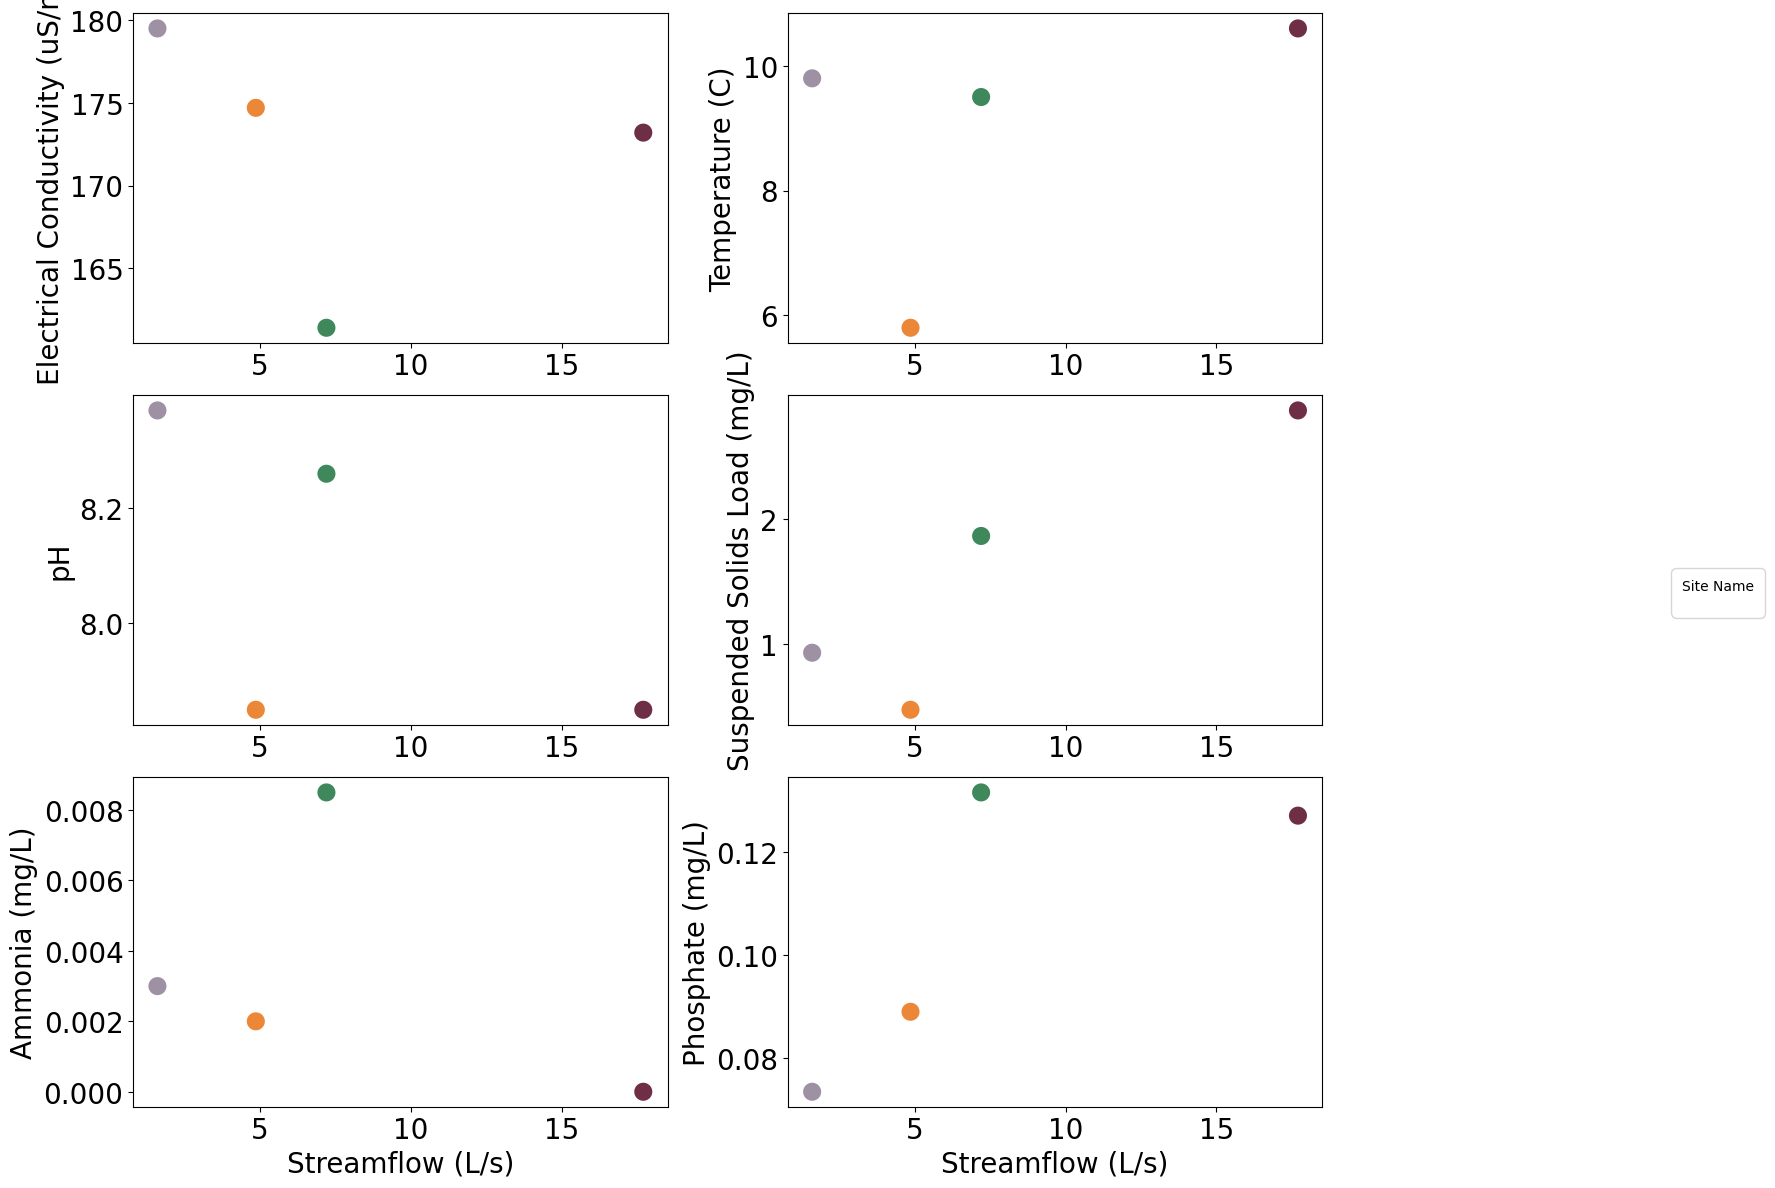

In [7]:
# Define custom colors for each Sample ID
custom_palette = {
    'Con2Main': '#3E885B',
    'Meadown Reach Down': '#254E70',
    'Middle Rose': '#6D2E46',
    'Con2East': '#9D91A3',
    'Con1Spring': '#3EC300',
    'Con1East': '#EB8736'
}

# Define the variables to plot
variables = {
    "EC (uS/m)": "Electrical Conductivity (uS/m)",
    "Temp (C)": "Temperature (C)",
    "pH": "pH",
    "SSL (mg/L)": "Suspended Solids Load (mg/L)",
    "NH3 (mg/L)": "Ammonia (mg/L)",
    "PO4 (mg/L)": "Phosphate (mg/L)"
}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot each variable against Distance from Outlet
for i, (variable, ylabel) in enumerate(variables.items()):
    # Scatter plot with custom colors (suppress legend in each individual plot)
    sns.scatterplot(
        data=data,
        x='Streamflow (L/s)',
        y=variable,
        hue='Site Name',
        palette=custom_palette,
        s=200,
        ax=axes[i],
        legend=False
    )

    # Add labels
    axes[i].set_ylabel(ylabel, fontsize=20)

    # Only add x-axis labels to the bottom two panels
    if i >= len(variables) - 2:  # Bottom two panels
        axes[i].set_xlabel('Streamflow (L/s)', fontsize=20)
    else:
        axes[i].set_xlabel('')  # Remove x-axis labels for top panels

# Make x and y ticks larger
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
# Adjust for empty axes if variables < subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend with the colors for Sample ID to the right of the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Site Name', loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=20)

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legend
plt.show()